<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1: Preprocessing and analysis
## Alex Lagarde
### 2/28/2021

# 3. Code Libraries

In [ ]:
# 3. Code Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 4. Reading in CSV File

In [ ]:
# 4. Reading in datafile and displaying the first few rows
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1oQMcpoR3QC7w_sWIbtyid2N2j0o49_pk')
df.head(10)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
6,ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
7,ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
8,ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
9,ID12110,54,24212.10,2,MALE,TOWN,YES,YES,YES,YES,NO,NO


# 5. Exploring General Data Characteristics

### a. What is the min, max, and average for age, income, and children?

In [ ]:
# 5a. Taking minimum, maximum, and average for age, income, and children
print('Age: \n', 'min:', df['age'].min(), 
      '\n', 'max:', df['age'].max(),
      '\n', 'mean:', df['age'].mean())

print('Income: \n', 'min:', df['income'].min(),
      '\n', 'max:', df['income'].max(),
      '\n', 'mean:', df['income'].mean())

print('Children: \n', 'min:', df['children'].min(),
      '\n', 'max:', df['children'].max(),
      '\n', 'mean:', df['children'].mean())

Age: 
 min: 18 
 max: 67 
 mean: 42.395
Income: 
 min: 5014.21 
 max: 63130.1 
 mean: 27524.0312166667
Children: 
 min: 0 
 max: 3 
 mean: 1.0116666666666667


Age


*   Minimum is 18 years old
*   Maximum is 67 years old
*   Average is 42.4 years old

Income


*   Minimum is 5,014.21 dollars
*   Maximum is 63,130.1 dollars
*   Average is 27,524.03 dollars

Children


* Minimum is 0 children
* Maximum is 3 children
* Average is 1.01 children






### b. How many customers own a car?

In [ ]:
# 5b. Displaying counts for car attribute
df['car'].value_counts()

NO     304
YES    296
Name: car, dtype: int64

There are 296 customers that own a car.

### c. Of the 4 regions, in which one do people have the highest average number of children?

In [ ]:
# 5c. Grouping by region and children, and then taking the mean
df.groupby('region')['children'].mean()

region
INNER_CITY    0.951673
RURAL         1.229167
SUBURBAN      0.967742
TOWN          1.000000
Name: children, dtype: float64

The rural region has the highest average number of children.

### d. Which region has the highest standard deviation of age? What does this mean?

In [ ]:
# 5d. Grouping by region and age, and then taking standard deviation
df.groupby('region')['age'].std()

region
INNER_CITY    14.987306
RURAL         14.396268
SUBURBAN      15.222039
TOWN          13.299309
Name: age, dtype: float64

The suburban region has the highest standard deviation for age. This means that the suburban region has a greater diversity in ages than other regions.

### e. What is the difference in average income between people who have a savings account and those who don't?

In [ ]:
# 5e. Subtracting mean income of people without savings from mean income with savings
savings = df['savings_acct'] == 'YES'
no_savings = df['savings_acct'] == 'NO'
difference = df['income'][savings].mean() - df['income'][no_savings].mean()
difference

7417.4377146641855

The difference between the average income in people who do have a savings account and do not have a savings account is around 7417.44.

### f. Compare and contrast the subsets of customers who buy and don't buy the PEP (Personal Equity Plan). Can you observe any significant differences between these segments of customers? Discuss your observations.



In [ ]:
# 5f. Creating summary statistics tables for PEP customers and Non-PEP customers
pep = df['pep'] == 'YES'
pepno = df['pep'] == 'NO'
print('Buy PEP: \n', df[pep].describe())
print('Do not buy PEP: \n',df[pepno].describe())

Buy PEP: 
               age        income    children
count  274.000000    274.000000  274.000000
mean    45.127737  30644.919453    0.945255
std     14.327991  13609.613043    0.860571
min     18.000000   7756.360000    0.000000
25%     34.000000  19639.475000    0.000000
50%     45.000000  28080.050000    1.000000
75%     58.000000  38458.350000    1.000000
max     67.000000  63130.100000    3.000000
Do not buy PEP: 
               age        income    children
count  326.000000    326.000000  326.000000
mean    40.098160  24900.953374    1.067485
std     14.123506  11661.123422    1.195524
min     18.000000   5014.210000    0.000000
25%     27.000000  15366.475000    0.000000
50%     40.000000  23105.000000    0.000000
75%     51.000000  31210.900000    2.000000
max     67.000000  61554.600000    3.000000


First, there are 52 less PEP customers than customers that did not buy PEP. Additionally, the standard deviations of the age of customers who buy PEP and do not buy PEP are almost identical. Therefore, the diversity in ages is very similar between the two groups; however, the mean age of customers who buy PEP is about five years older, which means the PEP customers tend to be a bit older. 

In terms of income, although there is more variability for PEP customers, using the median or middle 50%, they tend to possess around 5000 more currency. The maximum and minimum income are both higher for PEP customers too, which could help support the observation.

Finally, although the sample sizes may be inconclusive, there appears to be a small trend where non-PEP customers have more children. The 75 percentile for non-PEP is two children compared to one child for PEP. Furthermore, the mean averages are 1.07 and 0.95 respectively. Ultimately, the standard deviation is a tad higher too, which could indicate inconclusive observations. There ought to be more investigation.

# 6. Z-Score Standardization of Income Attribute

### a. What are the mean and standard deviation of the normalized income attribute? Why?

In [ ]:
# 6. Use z-score normalization to standardize the values of the income attribute. (Store this in a new variable called income_std. 
# Do not change the original income attribute in the table.) 
df['income_std'] = (df['income'] - df['income'].mean()) / df['income'].std()

# 6a. Displaying mean and standard deviation for new standardized income attribute
print('z-score mean:', df['income_std'].mean())
print('z-score standard deviation:', df['income_std'].std())

z-score mean: -2.5135449277513545e-15
z-score standard deviation: 1.0000000000000004


The mean and standard deviation of the normalized income attribute are approximately 0 and 1 respectively. The reason for this is z-score normalization follows a standard normal distribution with mu equal to 0 and sigma equal to 1. If you think about it, when subtract a record by the attribute mean, we are centralizing the attribute at 0. When we divide by the attribute standard deviation, we are making z correspond to the amount of standard deviations away from the mean. Each increase of 1 represents 1 standard deviation from the mean.

# 7. Discretization of Age Attribute

In [ ]:
# 7. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). (Store this in a new variable called age_disc. 
# Do not change the original age attribute in the table.)
df['age_disc'] = pd.qcut(df['age'], [0, .33, .66, 1], labels=["young", "mid-age", "old"])
df['age_disc'].value_counts()

young      209
old        198
mid-age    193
Name: age_disc, dtype: int64

There were 209 customers categorized as young, 193 as mid-age, and 198 as old. 

# 8. Min-Max Normalization on Numeric Attributes from Original Data

### a. What is the mean and standard deviation of income after min-max normalization? Why are these different than the values after z-score normalization?

In [ ]:
# 8. Make a copy of the original data called bank_norm. Use Min-Max Normalization to transform the values of all numeric attributes (income, age, children).
# Update the values in bank_norm into the range 0.0-1.0.
bank_norm = df.drop(['income_std', 'age_disc'], axis = 1)
def min_max(x):
  if (x.dtypes == np.int64) | (x.dtypes == np.float64):
    return  (x-x.min())/(x.max()-x.min())
  else:
    return x
bank_norm = bank_norm.apply(min_max)

# 8a. Displaying mean and standard deviation for new normalized income attribute
print('Min-max mean:', bank_norm['income'].mean())
print('Min-max standard deviation:', bank_norm['income'].std())

Min-max mean: 0.3873264474942505
Min-max standard deviation: 0.22196112363814038


After implementing min-max normalization, the mean income is 0.39, and the standard deviation is 0.22. These numbers are different than z-score normalization because the min-max normalization forces the boundaries between 0 and 1 to scale the numbers from the minimum to the maximum. The closer to 0 means the number is in the ballpark of the minimum; thus, the closer to 1 means the number is approaching the maximum. Therefore, the mean and standard deviation will not be the same as the z-score normalization. 

#9. Using One Hot Encoding on Categorical Attributes

### a. First drop the id column.
### b.  Convert each categorical attribute into multiple binary ("dummy") attributes  (one for each of the possible values of the categorical attribute) and assign binary values corresponding to the presence or not presence of the attribute value in the original record. The numeric attributes should remain unchanged. [Hint: you might consider using the get_dummies for Pandas data frames.] gender_bin = pd.get_dummies(bank_norm["gender"], prefix="gender")

In [ ]:
# 9. Convert the table (after normalization in the previous part) into the standard 
# spreadsheet format (which means, do each of the following).
# a. Dropping ID attribute
bank_norm.drop(['id'], inplace=True, axis=1)
# b. One hot encoding 
bank_norm = pd.get_dummies(bank_norm)
bank_norm.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
1,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0
2,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0
4,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0
5,0.795918,0.565343,0.666667,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1
6,0.081633,0.066468,0.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1
7,0.816327,0.342977,0.000000,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0
8,0.387755,0.349132,0.666667,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
9,0.734694,0.330338,0.666667,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0


### c. Save this new table into a file called bank_numeric.csv and submit it along with your assignment. 

In [ ]:
# 9c. Writing to csv and saving file
bank_norm.to_csv('bank_numeric.csv', float_format='%1.2f')

# 10. Correlation Analysis

### a. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Show the correlation matrix as a table of numbers. 

In [ ]:
# 10a. Displaying table of correlation coefficients 
bank_corr = bank_norm.corr()
bank_corr

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,0.010394,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,-0.008386,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,-0.048716,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,-0.021110,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,0.021110,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,0.003254,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,-0.022649,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,0.012483,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,0.006369,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,-1.000000,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


### b. Show the correlation matrix as a heatmap. Make sure to include a colorbar.

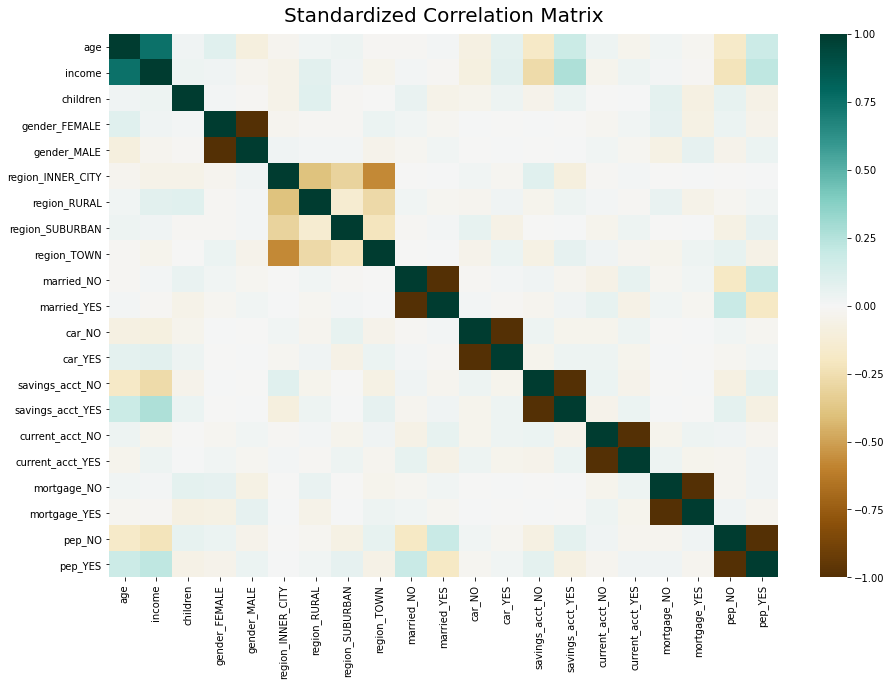

In [ ]:
# 10b. Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(bank_corr, vmin=-1, vmax=1, cmap='BrBG')
plt.title('Standardized Correlation Matrix', fontdict= {'fontsize': 20}, pad=12)
plt.show()

### c. Discuss your results, focusing on the few most significant positive or negative correlations among pairs of attributes. 


Most notably, there appears to be a fairly positive correlation between age and income. Moreover, there seems to be a moderate negative correlation between town region and inner city region. Otherwise, the other variables display a weak positive correlation, weak negative correlation, or no correlation.

# 11. Plotting Scatterplot of Income and Age

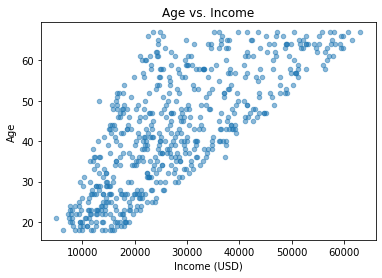

In [ ]:
# 11. Using Matplotlib library and/or plotting capabilities of Pandas, create a scatter 
# plot of the (non-normalized) Income attribute relative to Age. 
# Be sure that your plot contains appropriate labels for the axes.


df.plot(x='income', y='age', kind="scatter", marker = 'o', alpha = 0.5)
plt.ylabel('Age')
plt.xlabel('Income (USD)')
plt.title('Age vs. Income')
plt.show()

### a. Do these variables seem correlated? Why or why not?


Age and income are positively correlated together because the x and y values increase together over time.  When someone is 20 years old, they have the lowest income relatively because they lack experience.  As people gain experience over the years then they can negotiate for a higher income.  

# 12. Creating Histograms for Income Attribute with Different Number of Bins

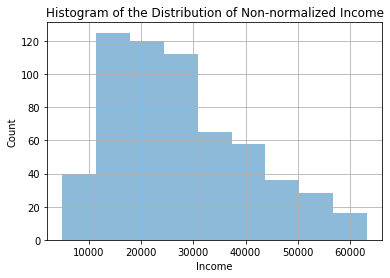

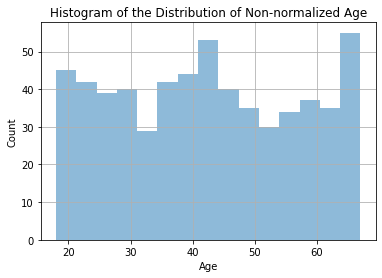

In [ ]:
# 12. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).
df.hist(column=['income'], bins=9, alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of the Distribution of Non-normalized Income')
plt.show()

df.hist(column=['age'], bins=15, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the Distribution of Non-normalized Age')
plt.show()

# 13. Bar Graph of Customers per Region

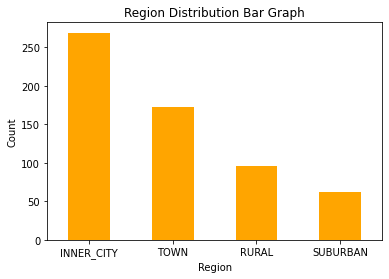

In [ ]:
# 13. Using a bar graph, plot the distribution of the values of the region attribute. 
# I.e., how many times each value occurs in the data.

df['region'].value_counts().plot(kind='bar', color = 'orange', rot = 0)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution Bar Graph')
plt.show()


# 14. Cross Tabulation of Region and PEP attributes

### a. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can use the Pandas crosstab function.] 

In [ ]:
# 14. Perform a cross-tabulation of the region attribute with the pep attribute. 
# This requires the aggregation of the occurrences of each pep value (yes or no) 
# separately for each value of the region attribute
# 14a. Crosstab table of counts
cross_tab = pd.crosstab(df['region'], df["pep"])
cross_tab

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


### b. Then, using the plot() function in Pandas, create a bar chart graph to visualize the relationships between these sets of variables.


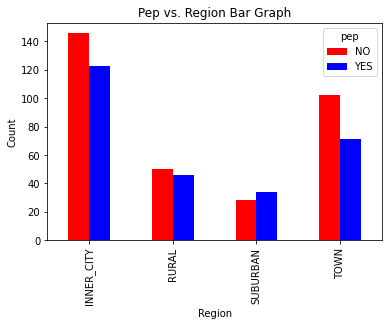

In [ ]:
# 14b. Bar graph of cross tab table

cross_tab.plot(kind="bar", color = ['red', 'blue'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Pep vs. Region Bar Graph')
plt.show()

# 15. Distribution Boxplots by Region

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


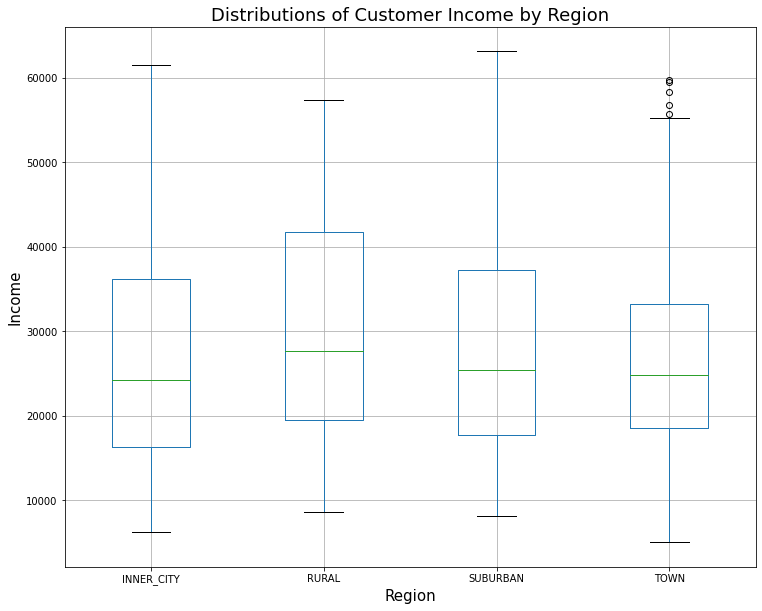

In [ ]:
# 15. Make a new visualization using the data (your choice) and, in a markdown cell, discuss what insights you can draw from this visualization.
axes = df.boxplot(column='income', by='region', figsize=(12,10))
plt.title('Distributions of Customer Income by Region', fontdict= {'fontsize' : 18})
plt.suptitle('')
plt.xlabel('Region', fontdict= {'fontsize' : 15})
plt.ylabel('Income', fontdict= {'fontsize' : 15})
plt.show()

### Insights
Customers that live in the inner city and suburban regions, tend to contain the most top percent of wealthy people; however, rural areas seem to on average contain the higher income, the higher 75 percentile, and the higher base income. This means the top 25% of customers have higher incomes in rural areas. Customers that live in towns, appear to contain more outliers as the diversity in incomes shrinks compared to other regions and as it is more rare to be relatively super wealthy. Not only do they have less variability, but the maximum and minimum incomes are noticeably lower than the rest. This appears to signify that customers who live in towns tend to be closer to one another in terms of income, while customers in the inner city seem to have more of a variety. 